<a href="https://colab.research.google.com/github/Chandan-Javali/dem_py/blob/main/d3_p2_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔹 Upload the CSV file first!


Saving predict_energy_consumption.csv to predict_energy_consumption.csv

🔹 Checking for missing values...
temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 86864.2500 - mae: 264.6930 - val_loss: 83402.5000 - val_mae: 258.4317
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87400.7578 - mae: 266.4553 - val_loss: 82642.7969 - val_mae: 256.9539
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86579.3281 - mae: 264.8340 - val_loss: 81461.5156 - val_mae: 254.6385
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87355.8672 - mae: 264.5702 - val_loss: 79673.1875 - val_mae: 251.0887
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83069.2344 - mae: 257.4704 - val_loss: 77106.1641 - val_mae: 245.8929
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81881.3594 - mae: 255.0270 - val_loss: 73531.8281 - val_mae: 238.4668
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75476.1797 - mae: 243.4247 - val_loss: 68874.7656 - val_mae: 228.4156
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74696.4531 - mae: 241.8943 - val_loss

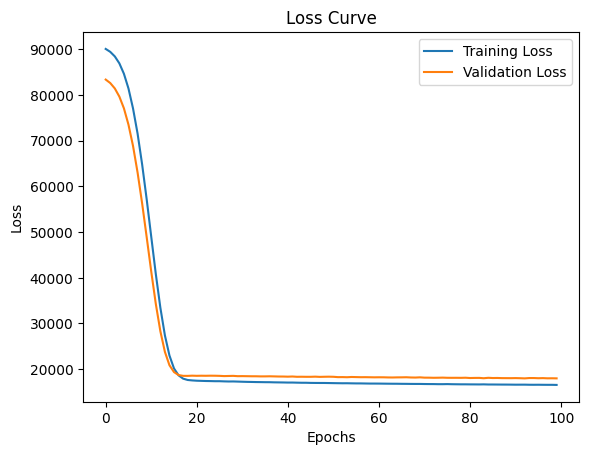

In [1]:
# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

# ✅ Step 2: Upload & Load Dataset
print("\n🔹 Upload the CSV file first!")
uploaded = files.upload()  # Manually upload the dataset

file_path = "/content/predict_energy_consumption.csv"  # Path of uploaded file
data = pd.read_csv(file_path)

# ✅ Step 3: Handle Missing Values
print("\n🔹 Checking for missing values...")
print(data.isnull().sum())  # Display missing values per column
data.fillna(data.median(), inplace=True)  # Fill missing values with median

# ✅ Step 4: Select Features (X) and Target Variable (y)
X = data.drop(columns=["energy_consumption"])  # Independent variables
y = data["energy_consumption"]  # Target variable

# ✅ Step 5: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 6: Scale Features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Step 7: Build FNN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# ✅ Step 8: Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ✅ Step 9: Train Model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

# ✅ Step 10: Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
print(f"\n🔹 Mean Absolute Error (MAE) on Test Data: {mae}")

# ✅ Step 11: Make Predictions
y_pred = model.predict(X_test)

# ✅ Step 12: Plot Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()
